# Online Retail Data
This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company
mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. The project work consists of demonstrating an aspect of the course using the selected 'Online Retail' dataset.

## Data set description
- **Source:** UK-based online retailer (year 2010-2011)
- **Rows:** Each row represents a transaction.
- **Columns:**
  - `InvoiceNo`: Invoice number
  - `StockCode`: Product code
  - `Description`: Product description
  - `Quantity`: Number of items purchased
  - `InvoiceDate`: Date/time of the invoice
  - `UnitPrice`: Price per unit
  - `CustomerID`: Customer ID
  - `Country`: Country of the customer

---

# Import data

In [1]:
import pandas as pd

file_path = 'Dataset_Online_Retail.csv'
df = pd.read_csv(file_path)

df_cleaned = df.copy()

df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


---
# 1. Data Preprocessing

<h2 style="color:#d36c87;">1.1. Data cleaning</h2>

### Handling Missing Values

In [2]:
df_cleaned.isnull().sum()

df_cleaned = df_cleaned.dropna(subset=['CustomerID'])

### Remove Duplicates

In [3]:
df_cleaned = df_cleaned.drop_duplicates()

### Check and Convert Data Types

In [4]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

### Check Invalid Values

In [5]:
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

### Identify and Remove Outliers

In [6]:
# Quantity Outliers
Q1_q = df_cleaned['Quantity'].quantile(0.25)
Q3_q = df_cleaned['Quantity'].quantile(0.75)
IQR_q = Q3_q - Q1_q
df_cleaned = df_cleaned[(df_cleaned['Quantity'] >= Q1_q - 1.5 * IQR_q) & (df_cleaned['Quantity'] <= Q3_q + 1.5 * IQR_q)]

#UnitPrice Outliers
Q1_p = df_cleaned['UnitPrice'].quantile(0.25)
Q3_p = df_cleaned['UnitPrice'].quantile(0.75)
IQR_p = Q3_p - Q1_p
df_cleaned = df_cleaned[(df_cleaned['UnitPrice'] >= Q1_p - 1.5 * IQR_p) & (df_cleaned['UnitPrice'] <= Q3_p + 1.5 * IQR_p)]

### Feature Engineering

In [7]:
# TotalPrice = Quantity * UnitPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

### Export Clean Dataset

In [8]:
df_cleaned.to_csv("Dataset_Online_Retail_Cleaned.csv", index=False)

<h2 style="color:#d36c87;">1.2. Data integration</h2>

In [9]:
numerical_df = df_cleaned[['Quantity', 'UnitPrice', 'CustomerID', 'TotalPrice']].dropna()

### Covariance & Correlation Analysis

Covariance Matrix:
               Quantity  UnitPrice    CustomerID   TotalPrice
Quantity      45.930945  -3.665583 -1.698719e+03    45.917542
UnitPrice     -3.665583   2.390161 -2.138029e+01     7.311779
CustomerID -1698.719018 -21.380289  2.928123e+06 -2798.113013
TotalPrice    45.917542   7.311779 -2.798113e+03   174.635352

--------------------------

Correlation Matrix:
            Quantity  UnitPrice  CustomerID  TotalPrice
Quantity    1.000000  -0.349846   -0.146479    0.512696
UnitPrice  -0.349846   1.000000   -0.008082    0.357885
CustomerID -0.146479  -0.008082    1.000000   -0.123738
TotalPrice  0.512696   0.357885   -0.123738    1.000000

--------------------------



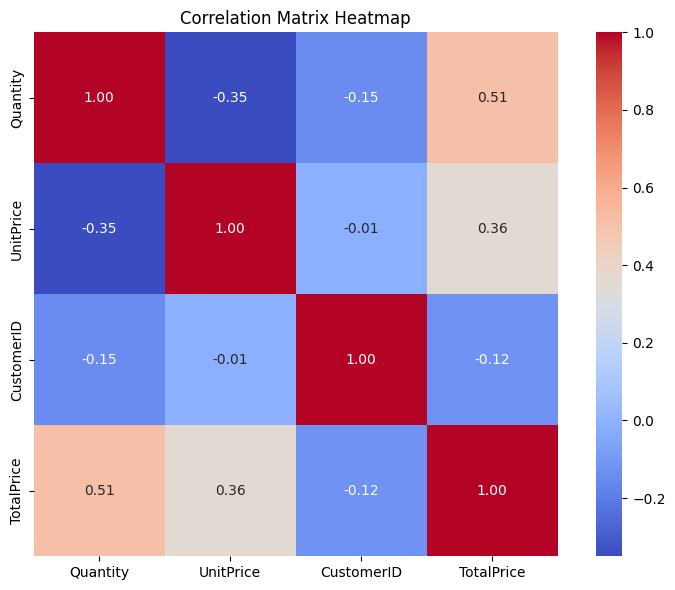

In [11]:
cov_matrix = numerical_df.cov()
corr_matrix = numerical_df.corr()

print("Covariance Matrix:")
print(cov_matrix)

print("")
print("--------------------------")
print("")

print("Correlation Matrix:")
print(corr_matrix)

print("")
print("--------------------------")
print("")

import seaborn as sns
import matplotlib.pyplot as plt

# Size of the plot
plt.figure(figsize=(8, 6))

# Correlation Matrix HeatMap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)

plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

<h2 style="color:#d36c87;">1.3. Data reduction</h2>

### Dimensionality reduction

### Numerosity reduction

### Data compression

<h2 style="color:#d36c87;">1.4. Data transformation and data discretization</h2>

---
# 2. Data Visualization